<a href="https://colab.research.google.com/github/ojasviG/Stats/blob/main/GuptaCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

Expensive in terms of both money and time to train new employees.
Loss of experienced employees
Impact in productivity
Impact profit
Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

“Good data science is more about the questions you pose of the data rather than data munging and analysis” — Riley Newman



# Data Exploration and Data Cleaning

In [ ]:
!pip install pygal
!pip install cufflinks
!pip install aif360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 6.9 MB/s eta 0:00:00


Bias Mitigation Libary: AI Fairness 360 by IBM is being used here

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display
from aif360.algorithms.preprocessing.reweighing import Reweighing

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# sns.color_palette("Set3", as_cmap=True)
sns.set_style('darkgrid')
%matplotlib inline
import pygal
import cufflinks as cf
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5

In [ ]:
data =  pd.read_csv('CA2_data.csv')

In [ ]:
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,2,0.715820,2,0.000000,College,1,1,Medium,...,0.0,0.000000,0.000000,0.200,0.000000,Bad,0.150,0.222222,0.000000,0.294118
1,0.738095,0,1,0.126700,1,0.250000,Below College,1,1,High,...,1.0,1.000000,0.333333,0.250,0.500000,Better,0.250,0.388889,0.066667,0.411765
2,0.452381,1,2,0.909807,1,0.035714,College,4,1,Very High,...,0.0,0.333333,0.000000,0.175,0.500000,Better,0.000,0.000000,0.000000,0.000000
3,0.357143,0,1,0.923407,1,0.071429,Master,1,1,Very High,...,0.0,0.666667,0.000000,0.200,0.500000,Better,0.200,0.388889,0.200000,0.000000
4,0.214286,0,2,0.350036,1,0.035714,Below College,3,1,Low,...,0.0,1.000000,0.333333,0.150,0.500000,Better,0.050,0.111111,0.133333,0.117647
5,0.333333,0,1,0.646385,1,0.035714,College,1,1,Very High,...,0.0,0.666667,0.000000,0.200,0.333333,Good,0.175,0.388889,0.200000,0.352941
6,0.976190,0,2,0.874732,1,0.071429,Bachelor,3,1,High,...,1.0,0.000000,1.000000,0.300,0.500000,Good,0.025,0.000000,0.000000,0.000000
7,0.285714,0,2,0.899069,1,0.821429,Below College,1,1,Very High,...,1.0,0.333333,0.333333,0.025,0.333333,Better,0.025,0.000000,0.000000,0.000000
8,0.476190,0,1,0.081603,1,0.785714,Bachelor,1,1,Very High,...,1.0,0.333333,0.000000,0.250,0.333333,Better,0.225,0.388889,0.066667,0.470588
9,0.428571,0,2,0.856836,1,0.928571,Bachelor,3,1,High,...,0.0,0.333333,0.666667,0.425,0.500000,Good,0.175,0.388889,0.466667,0.411765


In [ ]:
data['Education'] = data['Education'].map(
                   {'Bachelor':3, 'Master':2, 'College':1 ,'Below College':0})

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,JobLevel,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.729932,2.063946,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,0.711561,1.106940,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2.000000,1.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,3.000000,2.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,3.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,4.000000,5.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
data.size

51450

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.EmployeeCount.nunique(dropna = True)

1

In [ ]:
data.drop(columns='EmployeeCount', inplace=True)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,1,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,4,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,2,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,3,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,4,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,...,3,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,...,1,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,...,2,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,...,4,80,0,17,3,Good,9,6,0,8


In [ ]:
print(data.skew())

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
EmployeeCount               0.000000
EmployeeNumber              0.016574
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64


<ipython-input-50-a7807bf59cf5>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.skew())


# Features that are moderately skewed: TrainingTimesLastYear, JobInvolvement, Age, StandardHours


In [ ]:
data.drop(columns='EmployeeNumber', inplace=True)


# Possible columns to drop: Age and Daily Rate

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-22-4e78463104bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
<ipython-input-22-4e78463104bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1,ax=ax)


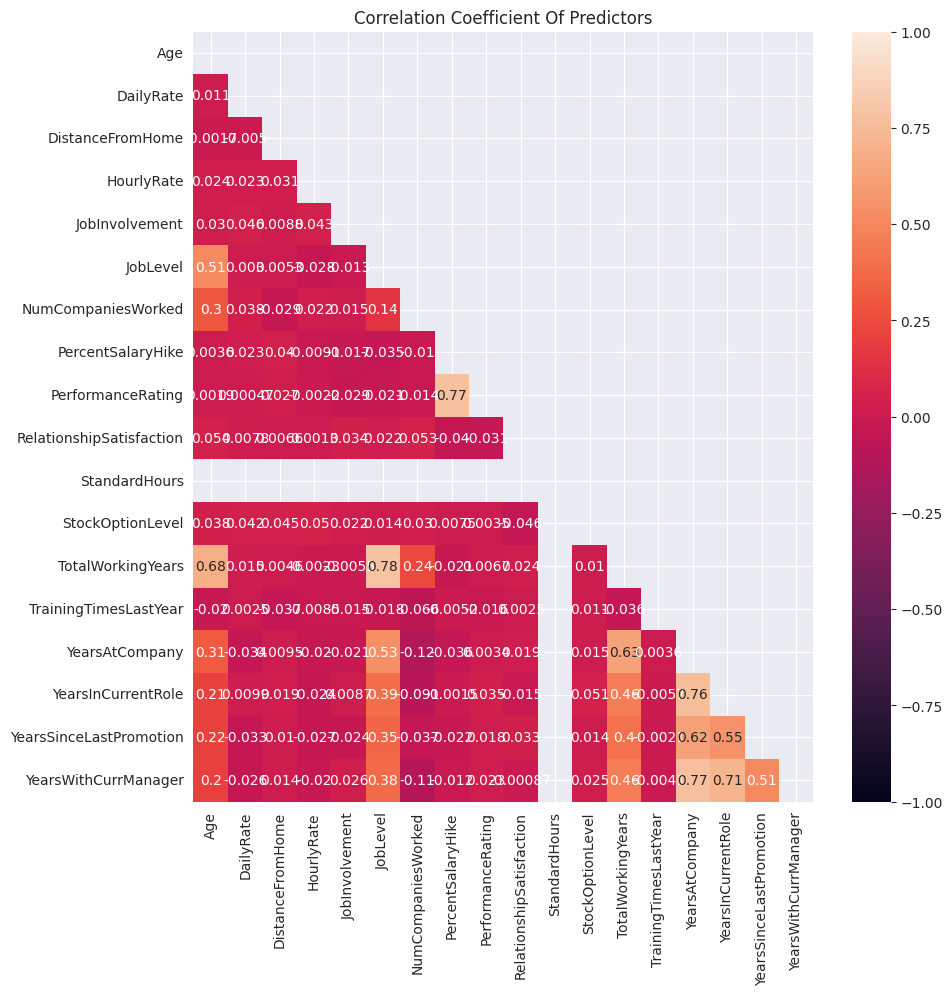

In [ ]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1,ax=ax)
plt.title('Correlation Coefficient Of Predictors')
#(do a regular corr)
plt.show()

# There are no features that cross 0.80 on the correlation coefficient scale.

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

## Data Visualization and Inference

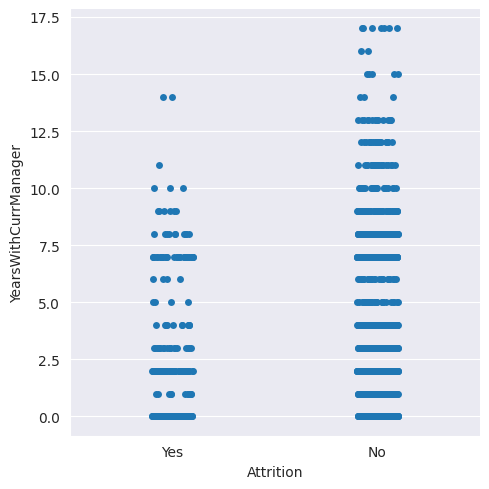

In [ ]:
sns.catplot(data=data, x="Attrition", y="YearsWithCurrManager")

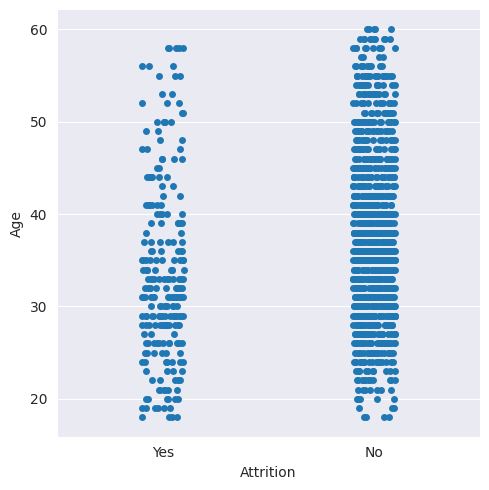

In [ ]:
sns.catplot(data=data, x="Attrition", y="Age")

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

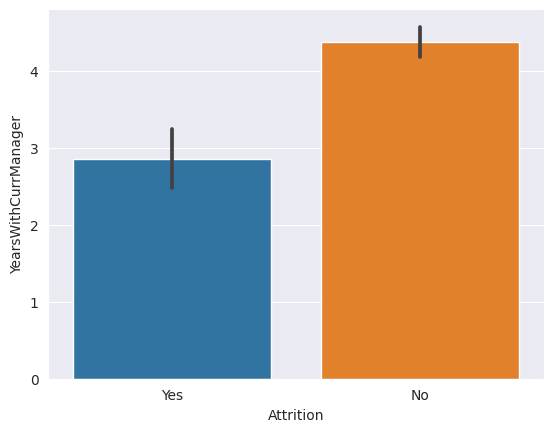

In [ ]:
sns.barplot(x='Attrition',y='YearsWithCurrManager',data=data)

<Axes: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

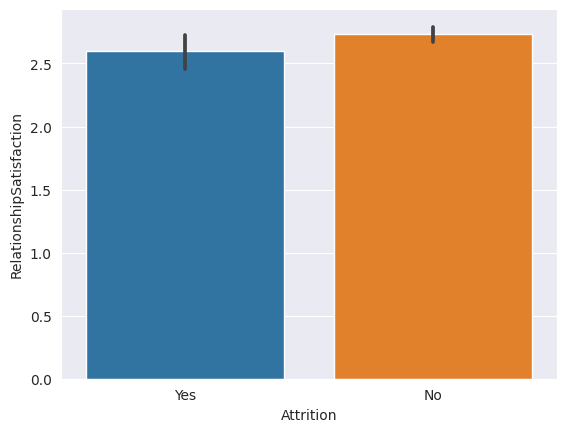

In [ ]:
sns.barplot(x='Attrition',y='RelationshipSatisfaction',data=data)

<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

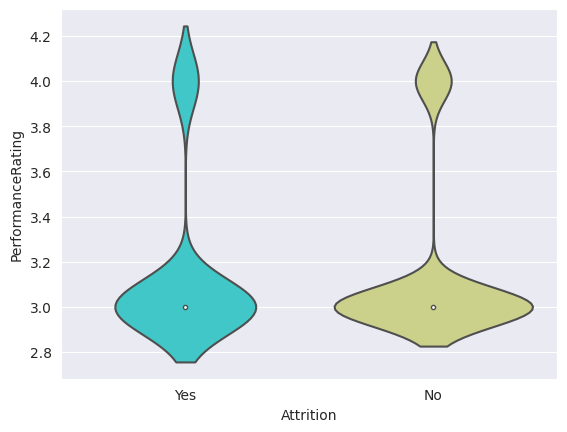

In [ ]:
#sns.boxplot(x='Attrition',y='StockOptionLevel',data=data,palette='rainbow')
sns.violinplot(x="Attrition", y="PerformanceRating", data=data,palette='rainbow')
#sns.stripplot(x="Attrition", y="total_bill", data=data)
#sns.swarmplot(x="Attrition", y="total_bill", data=data)

# HYPOTHESIS TESTING and Chi Sqaure Test and ANOVA

In [ ]:
from scipy.stats import chi2_contingency

1st Hypothesis



Attrition and Education are dependent or affected by each other.







In [ ]:
H0= 'DEPENDENT RELATION BETWEEN ATTRITION AND EDUCATION'
HA= 'INDEPENDENT RELATION BETWEEN ATTRITION AND EDUCATION'

In [ ]:
import scipy.stats as stats
ct = pd.crosstab(data.Attrition, data.Education, margins=True)
stats,p,dof,expected = chi2_contingency(ct)
print(ct)
print("P-VALUE : ", p)
if p>0.05 :
    print(H0)
else:
    print(HA)


Education  Bachelor  Below College  College  Master  PhD   All
Attrition                                                     
No              473            139      238     340   43  1233
Yes              99             31       44      58    5   237
All             572            170      282     398   48  1470
P-VALUE :  0.9796294822257321
DEPENDENT RELATION BETWEEN ATTRITION AND EDUCATION


Hence proven that they are dependent.

2nd Hypothesis


Attrition and Work-life balance are dependent or affected by each other.




In [ ]:
dep_counts= data['Department'].value_counts()
alpha = 0.05
for i in dep_counts.index[0:5]:
    sub_data = data[data.Department == i]
    ct = pd.crosstab(sub_data.Attrition, sub_data.WorkLifeBalance, margins=True)
    #ct = pd.crosstab(data.Attrition, data.Education, margins=True)
    stats,p,dof,expected = chi2_contingency(ct)
    #obs = np.array([ct.iloc[0][0:4].values,ct.iloc[1][0:4].values])
    print("For " + i + ": ")
    print(ct)
    print(p)

    #print('With an alpha value of {}:'.format(alpha))
    if p > alpha:
        print("Dependent relationship between Attrition and Work Life Balance")
    else:
        print("Independent relationship between Attrition and Work Life Balance")
    print("")


For Research & Development: 
WorkLifeBalance  Bad  Best  Better  Good  All
Attrition                                    
No                41    77     507   203  828
Yes               19    14      68    32  133
All               60    91     575   235  961
0.020215952185755007
Independent relationship between Attrition and Work Life Balance

For Sales: 
WorkLifeBalance  Bad  Best  Better  Good  All
Attrition                                    
No                10    40     226    78  354
Yes                6    12      50    24   92
All               16    52     276   102  446
0.8033481527196313
Dependent relationship between Attrition and Work Life Balance

For Human Resources: 
WorkLifeBalance  Bad  Best  Better  Good  All
Attrition                                    
No                 4     9      33     5   51
Yes                0     1       9     2   12
All                4    10      42     7   63
0.9798171991655011
Dependent relationship between Attrition and Work Life Bal

In [ ]:
chitable = pd.crosstab(data.Attrition,data.Gender)
stats,p,dof,expected = chi2_contingency(chitable)
print(chitable)
print("P-VALUE : ", p)

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150
P-VALUE :  0.29057244902890855


In [ ]:
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
data = data.drop(columns=['StandardHours',

                          'Over18',
                        ])

# Correlation Matrix

<ipython-input-62-dd025b045572>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col = data.corr().nlargest(20, "Attrition").Attrition.index


<Axes: >

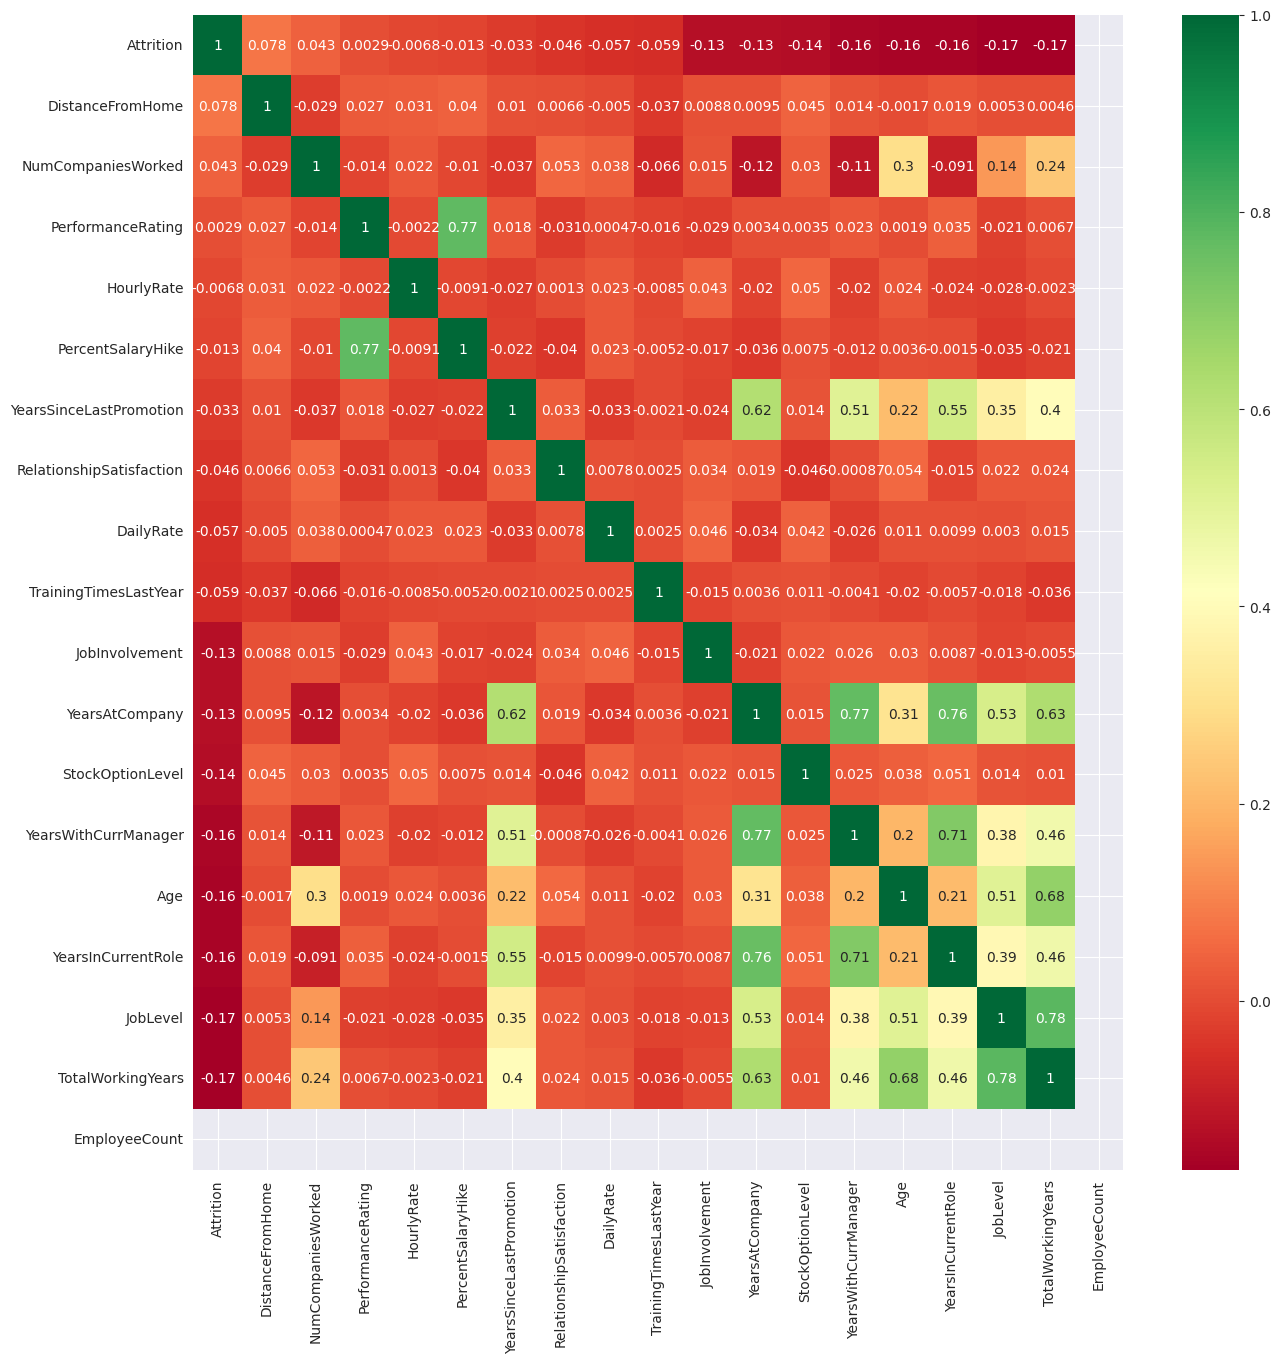

In [ ]:
col = data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

#PCA (Incomplete due to Error)

In [ ]:
from sklearn import preprocessing

x = data
scaler = preprocessing.scale(x)
cols = x.columns
data1 = pd.DataFrame(scaler, columns=cols, index=data.index)
data1['Attrition'] = data['Attrition']
from sklearn.decomposition import PCA
X = data
Y = X['Attrition']
del X['Attrition']
pca = PCA(n_components=24)
X = pca.fit_transform(X)
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
_ = plt.plot(var1)
_ = plt.xlabel('Number of Components')
_ = plt.ylabel('Percent of Explained Variance')
_ = plt.title('Primary Component Breakdown')
plt.show()
print(var1)

#Linear Regression

In [ ]:
import sklearn
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split
x=  data[['Age','JobLevel']]
y = data["Attrition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [ ]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
accuracy = regressor.score(x_test,y_test)
print(accuracy)

0.04675953514112574


##Result: Horrible Accuracy Rate

In [ ]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so=so.drop_duplicates()

print(so.head(50))

Age                       Age                         1.000000
JobLevel                  TotalWorkingYears           0.782208
PerformanceRating         PercentSalaryHike           0.773550
YearsAtCompany            YearsWithCurrManager        0.769212
                          YearsInCurrentRole          0.758754
YearsInCurrentRole        YearsWithCurrManager        0.714365
TotalWorkingYears         Age                         0.680381
                          YearsAtCompany              0.628133
YearsSinceLastPromotion   YearsAtCompany              0.618409
YearsInCurrentRole        YearsSinceLastPromotion     0.548056
YearsAtCompany            JobLevel                    0.534739
YearsWithCurrManager      YearsSinceLastPromotion     0.510224
JobLevel                  Age                         0.509604
YearsInCurrentRole        TotalWorkingYears           0.460365
YearsWithCurrManager      TotalWorkingYears           0.459188
TotalWorkingYears         YearsSinceLastPromotion     0

<ipython-input-63-eb0a76f112af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data.corr().abs()


<ipython-input-64-739e35fe7355>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataCorr = data.corr()


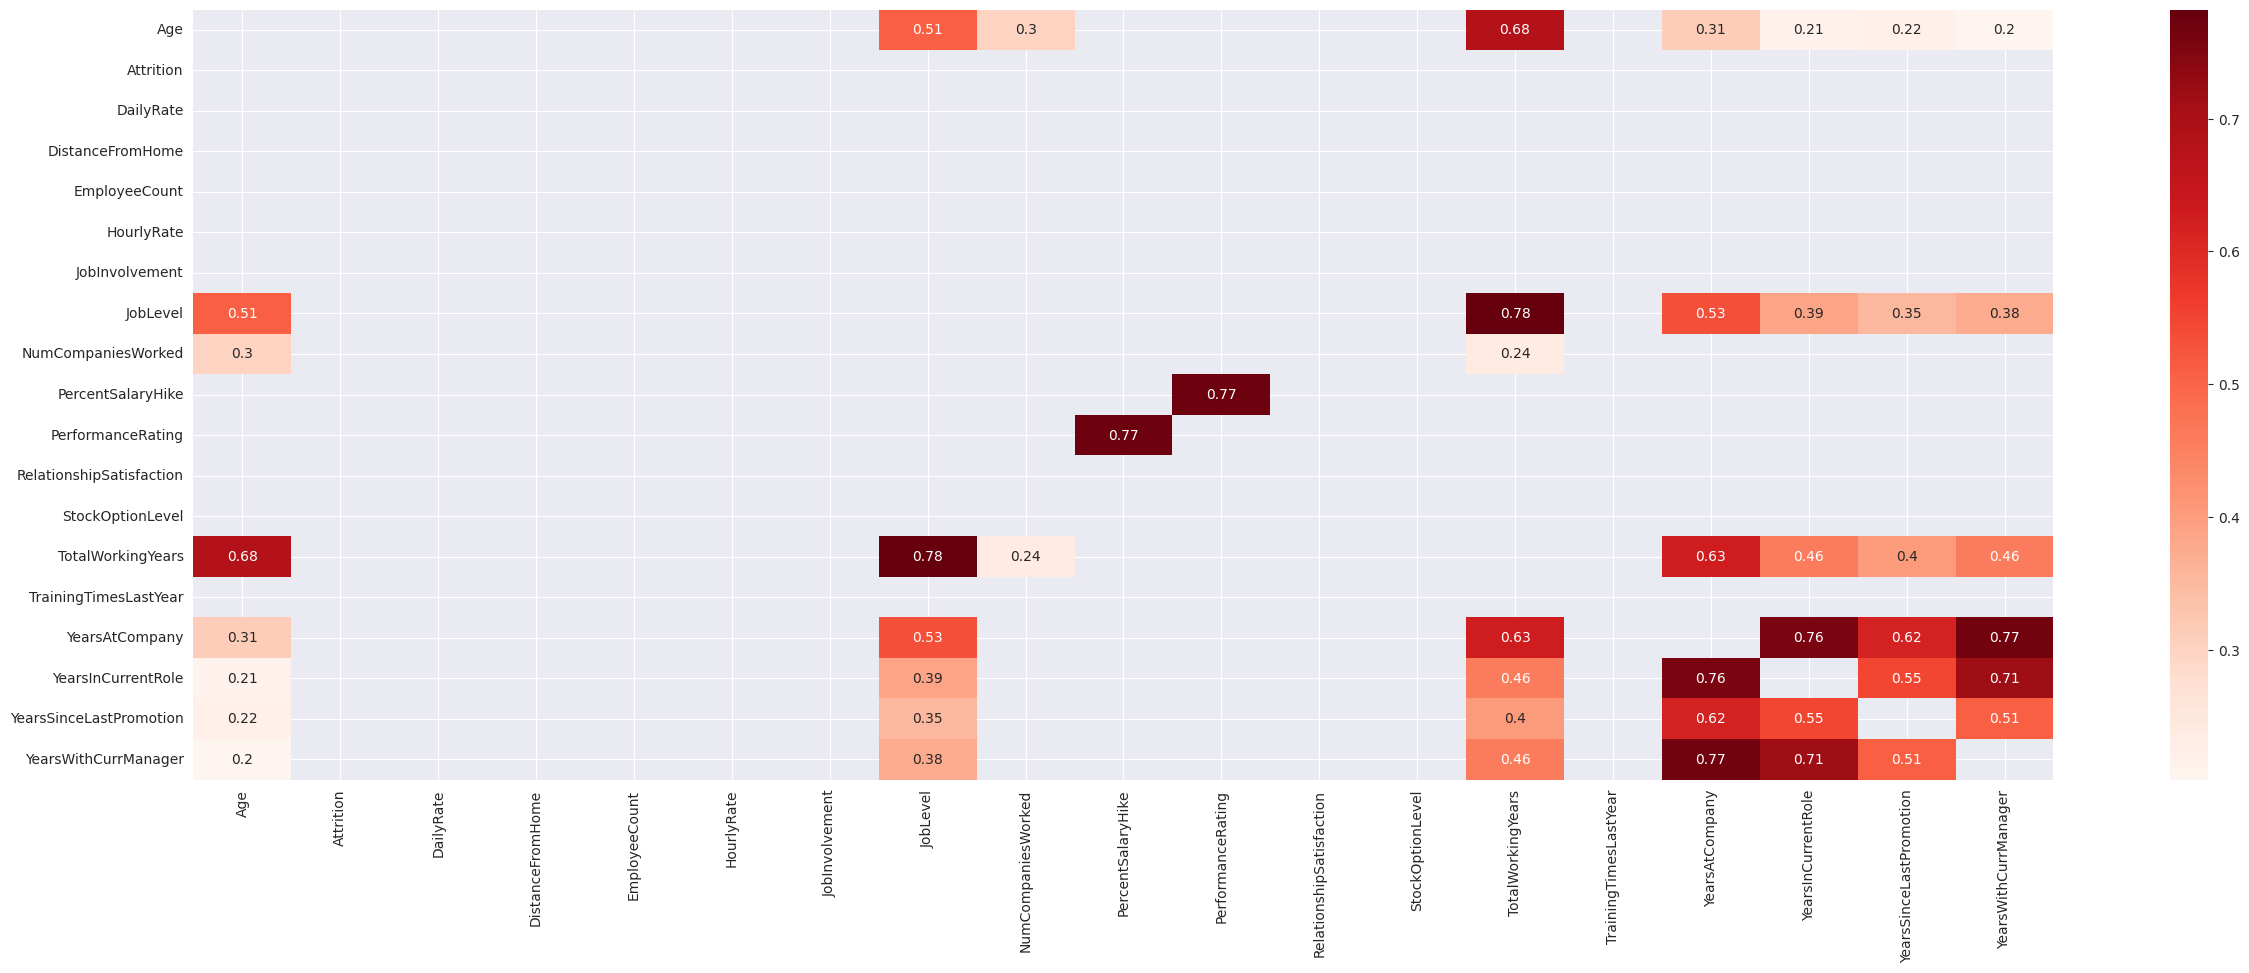

In [ ]:
dataCorr = data.corr()
filteredData = dataCorr[((dataCorr >= .2) | (dataCorr <= -.5)) & (dataCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredData, annot=True, cmap="Reds")
plt.show()


In [ ]:
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [ ]:
nom_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# ordinal data
ord_cols = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# additional features

In [ ]:
target_col = 'Attrition'
for feat in nom_cols + ord_cols:
    print('Attrition Correlation by:', feat)
    print(data[[feat, target_col]].groupby(feat, as_index=False).mean().sort_values(by=target_col, ascending=False))
    print('-'*50)

Attrition Correlation by: Department
   Department  Attrition
2           2   0.206278
0           0   0.190476
1           1   0.138398
--------------------------------------------------
Attrition Correlation by: EducationField
   EducationField  Attrition
0               0   0.259259
5               5   0.242424
2               2   0.220126
1               1   0.146865
3               3   0.135776
4               4   0.134146
--------------------------------------------------
Attrition Correlation by: Gender
   Gender  Attrition
1       1   0.170068
0       0   0.147959
--------------------------------------------------
Attrition Correlation by: JobRole
   JobRole  Attrition
8        8   0.397590
2        2   0.239382
1        1   0.230769
7        7   0.174847
6        6   0.160959
4        4   0.068966
0        0   0.068702
3        3   0.049020
5        5   0.025000
--------------------------------------------------
Attrition Correlation by: MaritalStatus
   MaritalStatus  Attriti

<ipython-input-68-3dd55efa4398>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=data.corr()[target_col]


<Axes: >

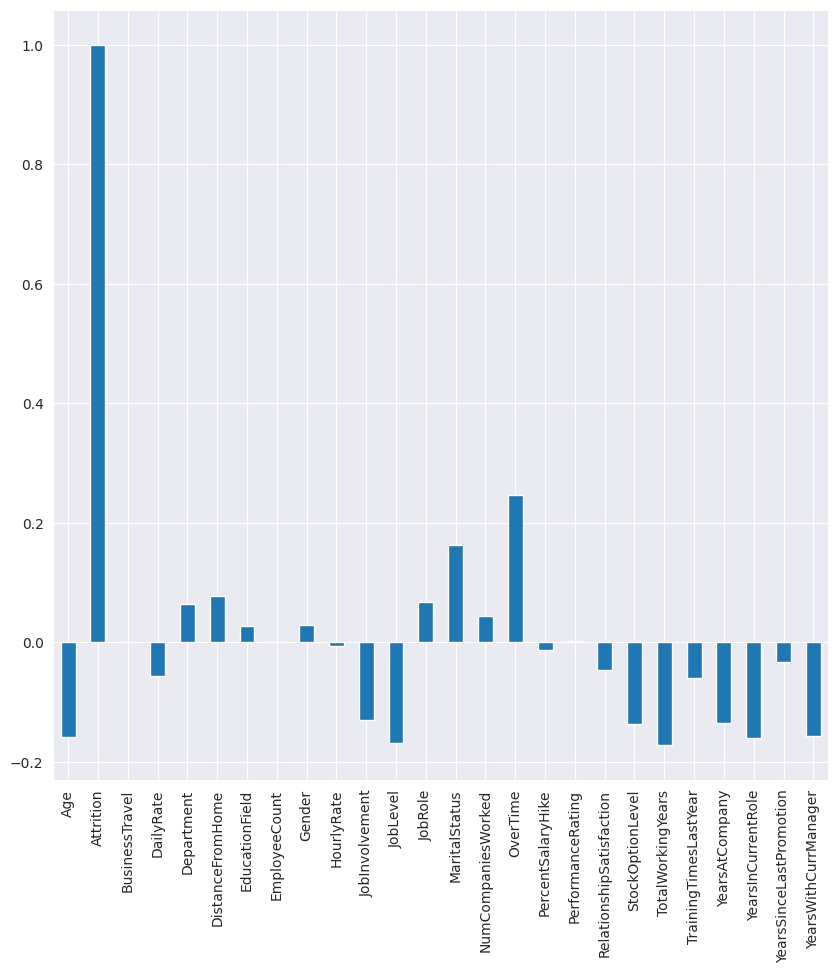

In [ ]:
x=data.corr()[target_col]
x.plot(kind="bar",figsize=(10, 10))

<ipython-input-69-0dcd156e52df>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 10))


<Axes: >

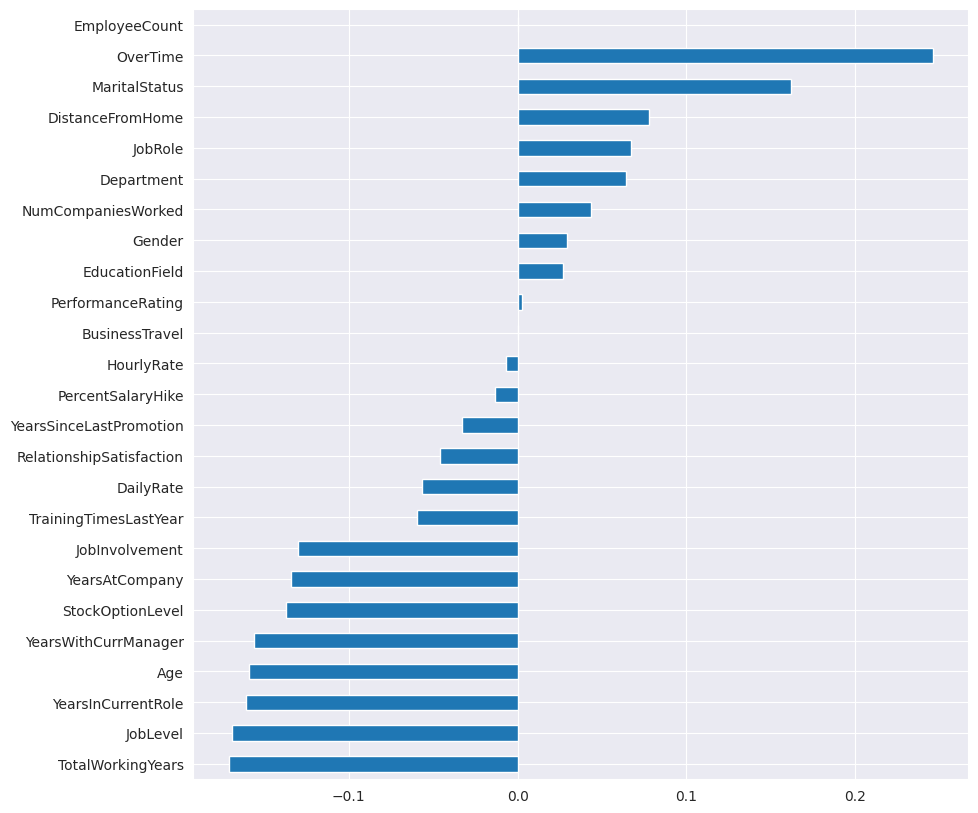

In [ ]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 10))

#CHI Square

In [ ]:
factors_paired = [(i,j) for i in data.columns.values for j in data.columns.values]

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        if chitest[1]>0.05:
            p_values.append(chitest[1])
        else:
            p_values.append(0)

    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

chi2 = np.array(chi2).reshape((32,32)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=data.columns.values, columns=data.columns.values)

In [ ]:
p_values= np.array(p_values).reshape((32,32)) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=data.columns.values, columns=data.columns.values)
p_values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,0.000000,0.000000,0.556622,0.000000,0.372658,0.653262,0.000000,0.939061,1.0,0.615702,...,0.891773,0.238580,0.051967,0.000000,0.000000,0.588734,0.000000,0.000000,0.000000,0.000000
Attrition,0.000000,0.000000,0.000000,0.620280,0.000000,0.095253,0.545525,0.000000,1.0,0.000000,...,0.990075,0.154972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111934,0.000000
BusinessTravel,0.556622,0.000000,0.000000,0.536125,0.995236,0.633736,0.587116,0.879649,1.0,0.624462,...,0.587653,0.684531,0.909056,0.345763,0.872135,0.933126,0.253373,0.854711,0.511620,0.148368
DailyRate,0.000000,0.620280,0.536125,0.000000,0.155974,0.960816,0.288824,0.000000,1.0,0.638126,...,0.731934,0.501649,0.468844,0.724389,0.905614,0.515930,0.861000,0.106543,0.000000,0.896653
Department,0.372658,0.000000,0.995236,0.155974,0.000000,0.200185,0.936588,0.000000,1.0,0.326840,...,0.451686,0.307493,0.635810,0.952796,0.456841,0.051590,0.958613,0.478976,0.917580,0.745328
DistanceFromHome,0.653262,0.095253,0.633736,0.960816,0.200185,0.000000,0.379621,0.140440,1.0,0.351350,...,0.242784,0.295615,0.135636,0.738046,0.332414,0.857193,0.778929,0.364560,0.000000,0.667781
Education,0.000000,0.545525,0.587116,0.288824,0.936588,0.379621,0.000000,0.000000,1.0,0.327015,...,0.645254,0.360047,0.233690,0.000000,0.248963,0.847037,0.000000,0.674101,0.411312,0.456951
EducationField,0.939061,0.000000,0.879649,0.000000,0.000000,0.140440,0.000000,0.000000,1.0,0.205936,...,0.836748,0.108036,0.187056,0.605226,0.000000,0.254340,0.939599,0.628665,0.853422,0.910488
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EnvironmentSatisfaction,0.615702,0.000000,0.624462,0.638126,0.326840,0.351350,0.327015,0.205936,1.0,0.000000,...,0.563028,0.922894,0.530643,0.254676,0.578211,0.696343,0.537670,0.181049,0.634982,0.707212


In [ ]:
chi2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,0.000000,119.174949,81.510465,3.762656e+04,87.595541,1156.328313,333.741882,179.264007,0.0,120.735417,...,31.105372,136.923167,152.858681,5401.302728,303.245514,121.817909,2832.576047,1017.748568,759.592959,879.913155
Attrition,119.174949,0.000000,24.182414,8.715186e+02,10.796007,38.168500,3.073961,16.024674,0.0,22.503881,...,0.000155,5.241068,60.598301,122.302243,15.146451,16.325097,95.388755,64.300944,21.844970,74.617184
BusinessTravel,81.510465,24.182414,0.000000,1.763945e+03,0.201885,51.820400,6.538718,5.168394,0.0,4.386964,...,1.063238,3.941962,2.112611,82.370893,6.774717,1.848090,79.554621,27.192376,29.113892,42.581260
DailyRate,37626.556086,871.518577,1763.944934,0.000000e+00,1830.164522,24389.536866,3586.387805,4634.940607,0.0,2628.664310,...,858.570999,2654.032170,2660.033328,34357.999487,5175.057234,2651.424266,31586.280712,16152.609575,13581.119132,14826.365354
Department,87.595541,10.796007,0.201885,1.830165e+03,0.000000,64.649915,2.964141,1024.979247,0.0,6.935642,...,1.589536,7.146706,4.302523,58.368447,11.861810,12.505822,52.583632,35.779964,19.959959,28.242613
DistanceFromHome,1156.328313,38.168500,51.820400,2.438954e+04,64.649915,0.000000,115.967833,158.111000,0.0,88.355990,...,32.810726,90.456538,98.345161,1061.829559,175.382720,70.307179,973.230108,514.399688,479.465299,462.085123
Education,333.741882,3.073961,6.538718,3.586388e+03,2.964141,115.967833,0.000000,37.866032,0.0,13.599437,...,2.496548,13.124644,15.143360,237.283639,28.266423,7.157433,183.654591,66.083330,61.807985,68.595948
EducationField,179.264007,16.024674,5.168394,4.634941e+03,1024.979247,158.111000,37.866032,0.000000,0.0,19.174484,...,2.088647,21.991164,19.618611,189.120831,43.988901,18.160151,151.543060,85.019917,62.251789,68.075652
EmployeeCount,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EnvironmentSatisfaction,120.735417,22.503881,4.386964,2.628664e+03,6.935642,88.355990,13.599437,19.174484,0.0,0.000000,...,2.045446,3.819361,8.034797,126.686331,16.205462,6.428896,105.955208,63.298908,41.168590,45.066315


#ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols  # ols: Ordinary Least Square

3rd Hypothesis


Attrition and Business Travel are dependent or affected by each other.




In [ ]:
model = ols('Attrition~C(BusinessTravel)',data).fit() # Attrition is continious & ~C for categorical, here :BusinessTravel

oneway = sm.stats.anova_lm(model,type=2)   # lm- Linear model, type=1 for Linear regression
                                                            #  type=2 for ANOVA & ANCOVA
                                                            #  type=3 for Discriminent analysis

print(oneway)

                       df      sum_sq   mean_sq          F    PR(>F)
C(BusinessTravel)     2.0    3.270216  1.635108  12.268353  0.000005
Residual           1467.0  195.519580  0.133279        NaN       NaN


p value =0.000005 which is <0.05 Therefore the null hypothesis is rejected & Alternate is accepted.


Which means they are indepdent of each other.

In [ ]:
model = ols('Attrition~C(Department)',data).fit()

oneway2 = sm.stats.anova_lm(model,type=2)

print(oneway2)

                   df      sum_sq   mean_sq         F    PR(>F)
C(Department)     2.0    1.459957  0.729978  5.426843  0.004486
Residual       1467.0  197.329839  0.134513       NaN       NaN


4th Hypothesis


Attrition is affected by Gender and Business Travel as dependent variable




Two way ANOVA: Attrition vs Businesstravel

H0: There is no significance on Attrition due to the Business travel or Gender

H1: There is a significance on Attrition due to the Business travel or Gender

In [ ]:
model = ols('Attrition~C(BusinessTravel)+C(Gender)',data).fit() # Attrition is continious & ~C for categorical, here :BusinessTravel

twoway = sm.stats.anova_lm(model,type=2)   # lm- Linear model, type=1 for Linear regression
                                                            #  type=2 for ANOVA & ANCOVA
                                                            #  type=3 for Discriminent analysis

print(twoway)

                       df      sum_sq   mean_sq          F    PR(>F)
C(BusinessTravel)     2.0    3.270216  1.635108  12.275035  0.000005
C(Gender)             1.0    0.239646  0.239646   1.799064  0.180033
Residual           1466.0  195.279934  0.133206        NaN       NaN


Fairness Testing(Incomplete due to errors)

In [ ]:
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/Pipeline_LabelEncoder-0.1.zip --output-document=Pipeline_LabelEncoder-0.1.zip
!ls
!pip install Pipeline_LabelEncoder-0.1.zip

--2023-05-17 13:59:31--  https://github.com/IBM/employee-attrition-aif360/raw/master/data/Pipeline_LabelEncoder-0.1.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/Pipeline_LabelEncoder-0.1.zip [following]
--2023-05-17 13:59:32--  https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/Pipeline_LabelEncoder-0.1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3140 (3.1K) [application/zip]
Saving to: ‘Pipeline_LabelEncoder-0.1.zip’

Pipeline_LabelEncod 100%[===================>]   3.07K  --.-KB/s    in 0s      

2023-05-17 1

In [ ]:
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).fit_transform(data)
print('-------------------------')
#print('validation data encoding')
#validation_enc_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).transform(validation_input_data)

Inside fit transform
Feature OverTime
mapping {0: 0, 1: 1}
Feature JobRole
mapping {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
Feature Gender
mapping {0: 0, 1: 1}
-------------------------


In [ ]:
# Gender is the protected attribute.
#label 0: Employee will stay
#label 1: Employee will leave
# Gender 0: Female and Gender 1: Male
privileged_groups = [{'Gender': 0}]
unprivileged_groups = [{'Gender': 1}]
favorable_label = 0
unfavorable_label = 1
#Create binary label dataset that can be used by bias mitigation algorithms
BM_dataset = BinaryLabelDataset(favorable_label=favorable_label,
                                unfavorable_label=unfavorable_label,
                                df=data,
                                label_names=['Attrition'],
                                protected_attribute_names=['Gender'],
                                unprivileged_protected_attributes=unprivileged_groups)
display(Markdown("#### Training Data Details"))
print("shape of the training dataset", BM_dataset.features.shape)
print("Training data favorable label", BM_dataset.favorable_label)
print("Training data unfavorable label", BM_dataset.unfavorable_label)
print("Training data protected attribute", BM_dataset.protected_attribute_names)
print("Training data privileged protected attribute (1:Male and 0:Female)",
      BM_dataset.privileged_protected_attributes)
print("Training data unprivileged protected attribute (1:Male and 0:Female)",
      BM_dataset.unprivileged_protected_attributes)
metric_orig_train = BinaryLabelDatasetMetric(BM_dataset,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" %
      metric_orig_train.mean_difference())

ValueError: ignored

# Conclusion

Factors contributing more to the employee attrition are MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, Age, OverTime, DistanceFromHome, StockOptionLevel, JobLevel, JobRole, WorkLifeBalance, Gender.
Top three roles facing attrition
- 26% of employees who are likely to quit belong to Laboratory Technician group.
- 24% of employees belong to Sales Executive group.
- 19% of employees belong to Research Scientist group.
(other inferences are mentioned below each graph)

Fairness Testing wasn't conducted due to Technical Errors at the last step.